<a href="https://colab.research.google.com/github/sancarhacer/MachineLearning/blob/main/SimpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [51]:
df = pd.read_csv("studyhours.csv")
df.head()

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Study Hours  33 non-null     float64
 1   Exam Score   33 non-null     float64
dtypes: float64(2)
memory usage: 660.0 bytes


In [53]:
df.describe()

,Study Hours,Exam Score
count,33.000000,33.000000
mean,15.772727,74.612121
std,7.608723,18.711206
min,3.000000,40.000000
25%,9.600000,58.500000
50%,17.400000,78.800000
75%,21.300000,90.800000
max,30.000000,100.000000


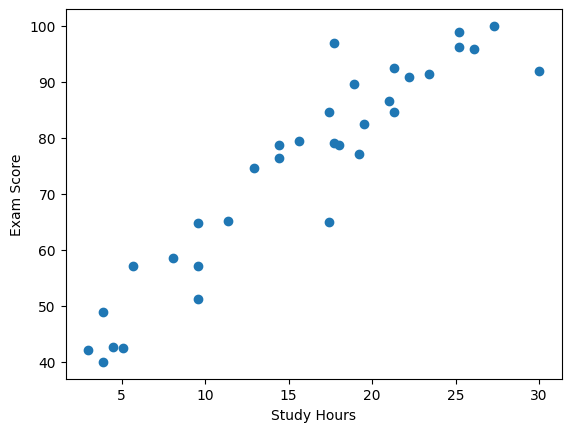

In [54]:
plt.scatter(df["Study Hours"],df["Exam Score"])
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()

In [55]:
## independent and dependent features
# X (independent variable) is a DataFrame because there can be more than one independent variable
# Y is a Series
X=df[['Study Hours']] # X = df['Study Hours']
y=df['Exam Score']
print(type(X),type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [56]:
# We split the data into training and testing sets
# we use sklearn
from sklearn.model_selection import train_test_split

# return X_train,X_test,y_train,y_test train_test_split func
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15)

In [57]:
y_train

,Exam Score
18,64.9
1,57.1
2,42.7
32,89.6
6,77.1
3,65.1
29,82.4
26,64.8
9,84.6
4,78.7


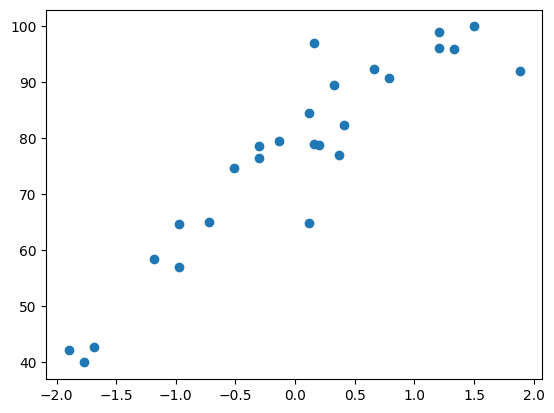

In [58]:
## Standardize the dataset
# StandardScaler standardizes features by removing the mean and scaling to unit variance using z-score normalization
# why:
# Features often have different scales, and standardization makes them comparable.
# Standardization speeds up and stabilizes optimization algorithms like gradient descent.
# Many models (e.g., k-NN, SVM, PCA) are scale-sensitive, so standardization improves their performance.
# Tree-based models (e.g., Decision Trees, Random Forests) are not affected by feature scaling.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

# The fit() step calculates the mean and standard deviation of the data.
# The transform() step uses the mean and standard deviation learned from the training set to scale the test data to the same range.
# If we also applied fit() on X_test, it would cause data leakage by exposing information from the test set.
## Standardize the dataset

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
plt.scatter(X_train,y_train)
plt.show()

In [59]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train) # train model

LinearRegression()

In [60]:
print("Coefficient : ",regression.coef_)
print("Intercept : ",regression.intercept_)


Coefficient :  [16.17860223]
Intercept :  76.9076923076923


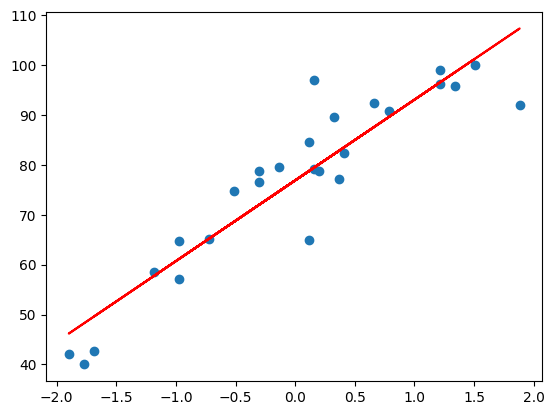

In [61]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),"r")
plt.show()

In [62]:
# prediction with test data
y_pred_test=regression.predict(X_test)


In [63]:
y_test,y_pred_test

(25    42.4
 14    86.6
 30    91.5
 16    57.2
 24    51.2
 20    49.0
 19    84.7
 Name: Exam Score, dtype: float64,
 array([50.95139904, 86.97131054, 92.40827832, 52.31064098, 61.14571361,
        48.23291515, 87.65093152]))

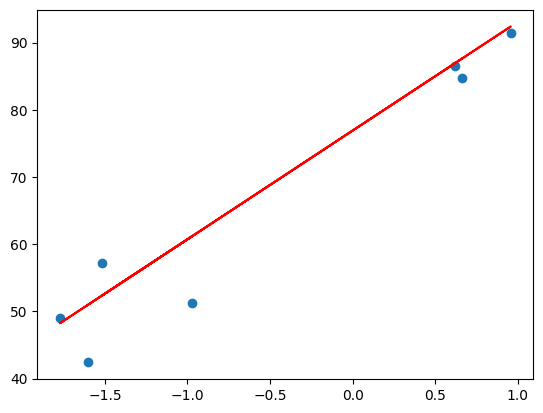

In [64]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred_test,"r")
plt.show()

In [65]:
### Performance metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error

In [66]:
mean_squared_error(y_test,y_pred_test)

29.45839048833392

In [67]:
mean_absolute_error(y_test,y_pred_test)

4.054868128856142

In [68]:
root_mean_squared_error(y_test,y_pred_test)

5.427558427906043

In [69]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
score

0.9196596206825491

In [70]:
#adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.903591544819059

In [76]:
# new data
regression.predict(scaler.transform([[10]]))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([62.05187491])